# Homework 9: Mediation & Power Analyses

This homework assignment is designed to give you practice with mediation, and with using Monte Carlo methods to conduct power analyses via simulation. You won't need to load in any data for this homework.

---
## 1. Simulating data (2 points)


In this homework, we're going to simulate the relationship between age, word reading experience, and reading comprehension skill. Older children tend to be better at reading comprehension tasks, but this isn't just an inherent part of getting older. It's a combination of gaining more experience with reading, oral language skills, and executive functions development. In this homework, though, we're going to simplify this relationship down to a direct effect of age on reading comprehension (since improvements in oral language skills and executive functions are more guaranteed as children age than reading practice is), and a mediation of word reading experience.

In graphical form: 
![picture](https://drive.google.com/uc?id=1wdm9xuiJhBJor99-9GnicO2_rzkGWtfN)

Writing the relationship out formally: 

$$x = \beta_{xa} a + \beta_{x0} + \epsilon_{x}$$

$$c = \beta_{ca} a + \beta_{cx} x + \beta_{c0} + \epsilon_c$$



$c$ is reading comprehension, $x$ is word reading experience, and $a$ is age. $\beta_{c0}$ and $\beta_{x0}$ are intercept terms for their respective formulas, and $\epsilon_{c}$ and $\epsilon_{x}$ are gaussian noise terms. We'll start by writing a function, `simulate_data`, that can simulate this relationship. The input values are set and the function structure is provided below. Complete the function such that it takes in those input variables and generates $age$, $x$, and $c$ values. Use `runif()` to generate ages. Use `rnorm()` to generate the noise terms. 

In [1]:
sample_size = 100 # How many children in data set? 
age_lo = 80     # minimum age, in months
age_hi = 200    # maximum age, in months
beta_xa = 0.5   # amount by which experience changes for increase of one month in age
beta_x0 = -5    # amount of experience when age = 0 (not interpretable, since minimum age for this data is 80 months)
sd_x = 50       # standard dev of gaussian noise term, epsilon_x
beta_ca = 0.8   # amount that comprehension score improves for every increase of one unit in age
beta_cx = 3     # amount that comprehension score improves for every increase of one unit in reading experience
beta_c0 = 10    # comprehension score when reading experience is 0. 
sd_c = 85      # standard dev of gaussian noise term, epsilon_c

simulate_data <- function(sample_size, age_lo, age_hi, beta_xa, beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c) {
    
    # WRITE YOUR CODE HERE
    age = runif(sample_size,age_lo,age_hi)
    x = beta_xa * age + beta_x0 + rnorm(sample_size,0,sd_x)
    c = beta_ca * age + beta_cx * x + beta_c0 + rnorm(sample_size,0,sd_c)
    
    return(data.frame(age=age,x=x,c=c)) # it's actually bad form to have a variable named "c" in R, my bad...
}

dat <- simulate_data(sample_size, age_lo, age_hi, beta_xa, beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c)
head(dat)

,age,x,c
,<dbl>,<dbl>,<dbl>
1,148.73349,112.819077,473.01966
2,172.94259,91.348377,462.39701
3,100.57935,68.724330,326.20823
4,100.51989,7.730195,73.99471
5,81.83282,58.748997,310.47030
6,96.20439,-59.013613,-174.66729


---
## 2. Visualizing Data (1 point)

Load the `tidyverse` library.

In [3]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



a) Plot the relationship between age and reading comprehension. 

`geom_smooth()` using formula 'y ~ x'



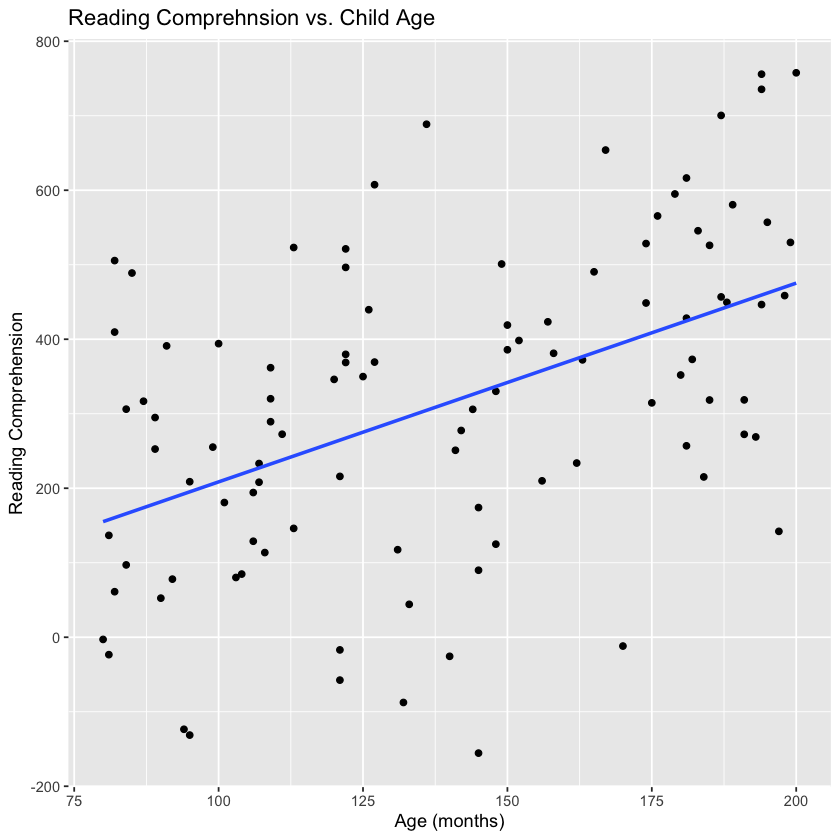

In [51]:
p <- ggplot(dat,aes(x=age,y=c)) + 
  geom_point() +
  geom_smooth(method="lm",se=FALSE)

p + xlab("Age (months)") +
  ylab("Reading Comprehension") +
  ggtitle("Reading Comprehnsion vs. Child Age")   

b) Plot the relationship between reading experience, age, and reading comprehension.

In [11]:
devtools::install_github("AckerDWM/gg3D") # to install it


✔  checking for file ‘/private/var/folders/hn/y_x3529x7vb1tx4xht7w9pgm0000gn/T/RtmpZqTU3m/remotes298d7f288dc7/AckerDWM-gg3D-ffdd837/DESCRIPTION’
─  preparing ‘gg3D’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
   Omitted ‘LazyData’ from DESCRIPTION
─  building ‘gg3D_0.0.0.9000.tar.gz’
   


Installing package into ‘/opt/homebrew/lib/R/4.1/site-library’
(as ‘lib’ is unspecified)



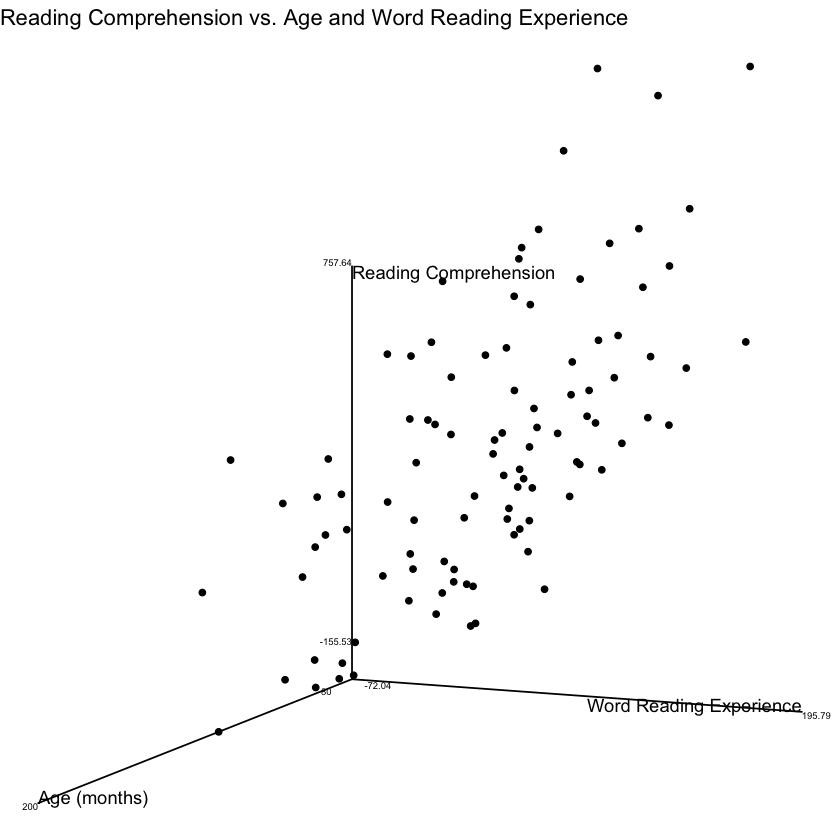

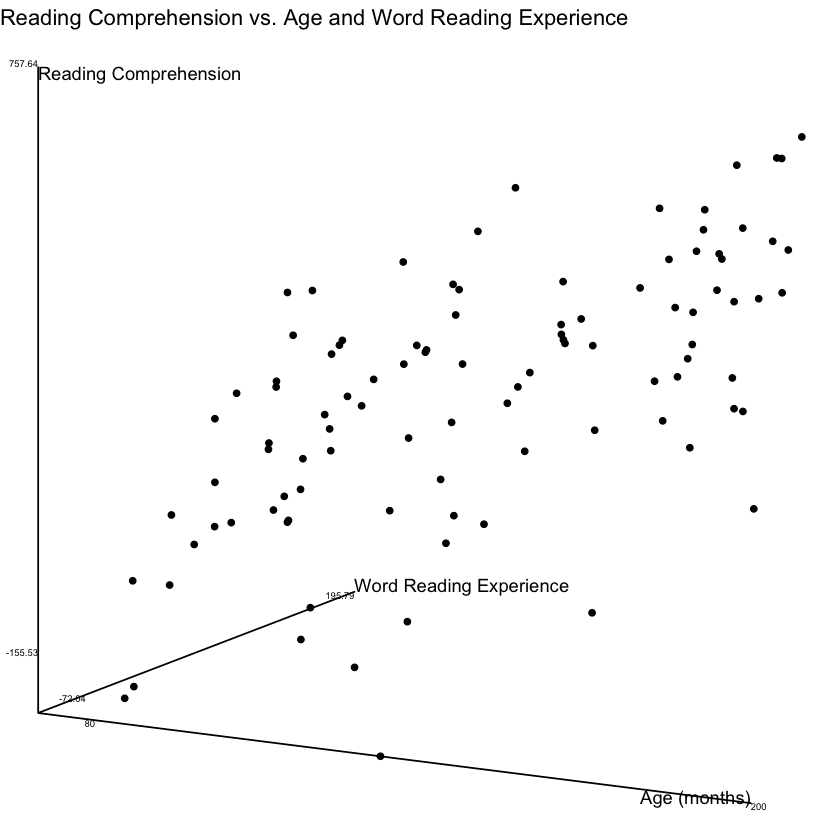

In [55]:
library("gg3D")

theta=110 
phi=0

p <- ggplot(dat, aes(x=age, y = x, z = c))+
  axes_3D(theta=theta, phi=phi)+
  stat_3D(theta=theta, phi=phi) +
  axis_labs_3D(theta=theta, phi=phi, size=2, 
               vjust="outward",hjust="outward") +
  labs_3D(theta=theta, phi=phi, 
          vjust="inward",hjust="inward",
          labs=c("Age (months)", "Word Reading Experience", "Reading Comprehension")) +
  theme_void()

p + ggtitle("Reading Comprehension vs. Age and Word Reading Experience")

theta=20 
phi=0

p <- ggplot(dat, aes(x=age, y = x, z = c))+
  axes_3D(theta=theta, phi=phi)+
  stat_3D(theta=theta, phi=phi) +
  axis_labs_3D(theta=theta, phi=phi, size=2, 
               vjust="outward",hjust="outward") +
  labs_3D(theta=theta, phi=phi, 
          vjust="inward",hjust="inward",
          labs=c("Age (months)", "Word Reading Experience", "Reading Comprehension")) +
  theme_void()

p + ggtitle("Reading Comprehension vs. Age and Word Reading Experience")

I plotted the relationship from two angles to get a better idea of the point cloud's 3D shape.

---
## 3. Mediation Analysis (3 points)

Load the `mediation` library.

In [59]:
install.packages("mediation")

Installing package into ‘/opt/homebrew/lib/R/4.1/site-library’
(as ‘lib’ is unspecified)



In [5]:
library(mediation)

Loading required package: MASS

Loading required package: Matrix

Loading required package: mvtnorm

Loading required package: sandwich

mediation: Causal Mediation Analysis
Version: 4.5.0




Use the `mediate` function to determine whether `x` mediates the relationship between `age` and `c`. Use `summary()` to print the model results. *Hint: see the mediation and moderation tutorial.*

In [64]:
fitM <- lm(x ~ age, data=dat) #Step 1: IV on M

fitY <- lm(c ~ x + age, data=dat) #Step 2: IV and M on DV

summary(fitM)
summary(fitY)


Call:
lm(formula = x ~ age, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-139.098  -38.559    3.798   39.910  123.147 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  -3.7861    20.8431  -0.182  0.85623   
age           0.4886     0.1448   3.375  0.00106 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 54.77 on 98 degrees of freedom
Multiple R-squared:  0.1041,	Adjusted R-squared:  0.09496 
F-statistic: 11.39 on 1 and 98 DF,  p-value: 0.001061



Call:
lm(formula = c ~ age + x, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-228.469  -54.967   -1.736   44.820  239.468 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -46.7315    30.6756  -1.523    0.131    
age           1.1799     0.2251   5.242 9.28e-07 ***
x             3.0457     0.1486  20.490  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 80.59 on 97 degrees of freedom
Multiple R-squared:  0.856,	Adjusted R-squared:  0.853 
F-statistic: 288.3 on 2 and 97 DF,  p-value: < 2.2e-16


In [65]:
fitMed <- mediate(fitM, fitY, treat="age", mediator="x")
summary(fitMed)


Causal Mediation Analysis 

Quasi-Bayesian Confidence Intervals

               Estimate 95% CI Lower 95% CI Upper p-value    
ACME              1.516        0.685         2.36  <2e-16 ***
ADE               1.172        0.729         1.64  <2e-16 ***
Total Effect      2.688        1.749         3.64  <2e-16 ***
Prop. Mediated    0.568        0.352         0.72  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Sample Size Used: 100 


Simulations: 1000 


How do you interpret these results? Why do you think the analysis yielded this result? 

`fitM` shows there is a relationship between word reading experience, x, and age. This makes sense, given that the former is a function of the latter in our `simulate_data` function.

`fitY` shows there is a relationship between reading comprehension and both word reading experience, x, and age. Note these are _individual_ relationships between our regressors (x and age) and c. Again, this makes sense, given our `simulate_data` function in that we build c as a function of x and age.

`fitMed` determines there is a significant _mediation_ effect of word experience on reading comprehension, roughly 57 ± 20% or so. 

---
## 4. Power Analysis via Simulation (4 points)

Now we're going to use our `simulate_data()` function to conduct a power analysis. The goal is to determine how many participants we would need in order to detect both the mediated and the direct effects in this data. 

*Note: We're going to pretend for the sake of simplicity that we don't have any control over the ages of the children we get (so ages are generated using `runif(sample_size, age_lo, age_hi)`, although of course this would be an unusual situation in reality.*

First, write a function, `run_analysis()`, that takes in simulated data and returns a vector containing the ACME and ADE estimates and p-values (these are the `d0`, `d0.p`, `z0`, and `z0.p` features of the mediated model object, e.g., `fitMed$d0.p`). Print this function's output for the data we simulated previously. 

In [2]:
run_analysis <- function(data) {
    
    fitM <- lm(x ~ age, data=data)
    
    fitY <- lm(c ~ x + age, data=data)
    
    fitMed <- mediate(fitM, fitY, treat="age", mediator="x")
    
    return(c(fitMed$d0,fitMed$d0.p,fitMed$z0,fitMed$z0.p)) 
}

In [112]:
run_analysis(data=dat)

[1] 1.482599 0.004000 1.174622 0.000000

Next fill in the function `repeat_analysis()` below so that it simulates and analyzes data `num_simulations` times. Store the outputs from each simulation in the `simouts` matrix. Calculate and return the coverage across all the simulations run for both ACME and ADE.

In [3]:
repeat_analysis <- function(num_simulations, alpha, sample_size, age_lo, age_hi, 
        beta_xa, beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c) {
    # Initialize simouts matrix for storing each output from run_analysis()
    simouts <- matrix(rep(NA,num_simulations*4), nrow=num_simulations,ncol=4)
    
    # Start simulating
    for (i in 1:num_simulations) {
        dat <- simulate_data(sample_size, age_lo, age_hi, beta_xa, beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c)

        simouts[i,] <- run_analysis(data=dat)
    }
    
    # Calculate coverage for both ACME and ADE estimates using p-values in simouts
    ACME_cov =  mean(simouts[,2] <= alpha)
    ADE_cov =  mean(simouts[,4] <= alpha)

    return(list(ACME_cov = ACME_cov, ADE_cov = ADE_cov))
    #return(simouts)
}

Now run the `repeat_analysis()` function using the same parameter settings as above, for 10 simulations, with an alpha criterion of 0.01. 

In [117]:
repeat_analysis(num_simulations=10, alpha=0.01, sample_size, age_lo, age_hi, 
        beta_xa, beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c)

$ACME_cov
[1] 1

$ADE_cov
[1] 0.8

Finally, do the same thing (10 simulations, alpha criterion of 0.01) but for 5 different sample sizes: 50, 75, 100, 125, 150. You can do this using `map` (as in the tutorial), or a simple `for` loop, or by calculating each individually. Up to you! This should take around 3 minutes to run. 

In [9]:
ss <- c(50, 75, 100, 125, 150)

for (j in ss) {
    print(j)
    
    res <- repeat_analysis(num_simulations=10, alpha=0.01, sample_size=j, age_lo, age_hi, 
        beta_xa, beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c)
    
    print(res)
}

[1] 50
$ACME_cov
[1] 0.5

$ADE_cov
[1] 0.3

[1] 75
$ACME_cov
[1] 0.4

$ADE_cov
[1] 0.7

[1] 100
$ACME_cov
[1] 0.6

$ADE_cov
[1] 0.6

[1] 125
$ACME_cov
[1] 0.8

$ADE_cov
[1] 0.9

[1] 150
$ACME_cov
[1] 1

$ADE_cov
[1] 0.9



If this were a real power analysis, we'd want to run more simulations per sample size (to get a more precise estimate of power) and we may also want to test out some other values of the parameters we used to simulate our data. However, what would you conclude just based on the results above? 

Note that, due to the small amount of simulation repetitions, the results above vary quite a bit on different runs. That said, an adequate sample size with an alpha criterion of 0.01 is 150 subjects. Below that, we fail to consistently detect the direct effect of age on c. Even at n=150, 9 of 10 simulations found the direct effect, so one could argue n should be even higher than 150 if we want 100% coverage at alpha=0.01.

**Given** how we generated the data, why was the direct effect harder to detect than the mediated effect?

`c` is drawn from a distribution modified by both `age` and `x`. Crucially, including `x` in the generation of `c` means that `c` will _always_ be some mixture of `age` and `x`. This _mediation_ by `x` shrouds the direct relationship between `age` and `c`.

**DUE:** 5pm EST, April 11, 2022

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Someone's Name*